In [38]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import surprise
# Data Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from surprise import Reader,Dataset
# Model Evaluation and Comparison
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
#load dataset
df = pd.read_csv('TMBD Movie Dataset.csv')

df.head()

,Unnamed: 0,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,popularity_level
0,0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,High
1,1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08,High
2,2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08,High
3,3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09,High
4,4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09,High


In [3]:
merged_df.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId,Unnamed: 0,id,imdb_id,popularity,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,popularity_level
0,1,1129,2.0,1260759185,82340,1103.0,8384,1103,tt0082340,1.003963,...,Science Fiction|Action,AVCO Embassy Pictures|Goldcrest Films Internat...,1981-05-22,336,6.5,1981,1.438914e+07,1.199095e+08,44000000.0,Medium
1,7,1129,3.0,851869103,82340,1103.0,8384,1103,tt0082340,1.003963,...,Science Fiction|Action,AVCO Embassy Pictures|Goldcrest Films Internat...,1981-05-22,336,6.5,1981,1.438914e+07,1.199095e+08,44000000.0,Medium
2,19,1129,3.0,855192347,82340,1103.0,8384,1103,tt0082340,1.003963,...,Science Fiction|Action,AVCO Embassy Pictures|Goldcrest Films Internat...,1981-05-22,336,6.5,1981,1.438914e+07,1.199095e+08,44000000.0,Medium
3,21,1129,3.0,853848738,82340,1103.0,8384,1103,tt0082340,1.003963,...,Science Fiction|Action,AVCO Embassy Pictures|Goldcrest Films Internat...,1981-05-22,336,6.5,1981,1.438914e+07,1.199095e+08,44000000.0,Medium
4,30,1129,3.0,945294508,82340,1103.0,8384,1103,tt0082340,1.003963,...,Science Fiction|Action,AVCO Embassy Pictures|Goldcrest Films Internat...,1981-05-22,336,6.5,1981,1.438914e+07,1.199095e+08,44000000.0,Medium


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'imdb_id', 'popularity', 'budget', 'revenue',
       'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'profit', 'popularity_level'],
      dtype='object')

In [5]:
#display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1287 non-null   int64  
 1   id                    1287 non-null   int64  
 2   imdb_id               1287 non-null   object 
 3   popularity            1287 non-null   float64
 4   budget                1287 non-null   float64
 5   revenue               1287 non-null   float64
 6   original_title        1287 non-null   object 
 7   cast                  1287 non-null   object 
 8   homepage              1287 non-null   object 
 9   director              1287 non-null   object 
 10  tagline               1287 non-null   object 
 11  keywords              1287 non-null   object 
 12  overview              1287 non-null   object 
 13  runtime               1287 non-null   int64  
 14  genres                1287 non-null   object 
 15  production_companies 

In [7]:
#summary of numerical column
df.describe()

,Unnamed: 0,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1.287000e+03
mean,4125.843046,52557.491064,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094,5.462994e+07,1.991775e+08,1.242409e+08
std,2671.936574,74450.077163,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503,5.525463e+07,2.968515e+08,2.183462e+08
min,0.000000,11.000000,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01,-4.139124e+08
25%,1972.000000,5851.500000,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000,1.519180e+07,2.764890e+07,3.142641e+06
50%,3523.000000,20178.000000,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000,3.556927e+07,8.674770e+07,4.524300e+07
75%,6554.500000,62209.500000,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000,7.630125e+07,2.351178e+08,1.470070e+08
max,10760.000000,333348.000000,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


In [8]:
#check missing value
df.isnull().sum()

Unnamed: 0              0
id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
profit                  0
popularity_level        1
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'id', 'imdb_id', 'popularity', 'budget', 'revenue',
       'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'profit', 'popularity_level'],
      dtype='object')

In [10]:
def format_names(x):
    # Check if the input is a string and contains '|'
    if isinstance(x, str) and '|' in x:
        # Split the string by '|', strip whitespace, and return as a list
        return [name.strip() for name in x.split('|')]
    else:
        # If input is not a string or doesn't contain '|', return an empty list
        return []

# Specify columns to process
features = ['cast', 'keywords', 'genres']

# Apply the format_names function to each specified feature column
for feature in features:
    df[feature] = df[feature].apply(format_names)

In [11]:
def format_director(x):
    # Check if the input is a non-empty string
    if isinstance(x, str) and x.strip():  # Ensure the string is not empty after stripping whitespace
        return [x.strip()]  # Return a list with the stripped director name
    else:
        return []  # Return an empty list for invalid or empty input

# Apply the format_director function to the 'director' column
df['director'] = df['director'].apply(format_director)

In [12]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''


In [13]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [14]:
def create_soup(row):
    # Join keywords, cast, and genres into a single string
    soup_parts = []
    
    # Append keywords (if available)
    if isinstance(row['keywords'], list):
        soup_parts.extend(row['keywords'])
    
    # Append cast (if available)
    if isinstance(row['cast'], list):
        soup_parts.extend(row['cast'])
    
    # Append director (if available)
    if isinstance(row['director'], str):
        soup_parts.append(row['director'])
    
    # Append genres (if available)
    if isinstance(row['genres'], list):
        soup_parts.extend(row['genres'])
    
    # Join all soup parts into a single string
    return ' '.join(soup_parts)

# Apply the create_soup function to each row of the DataFrame along axis=1
df['soup'] = df.apply(create_soup, axis=1)

## Data Analysis

### Number Of Votes

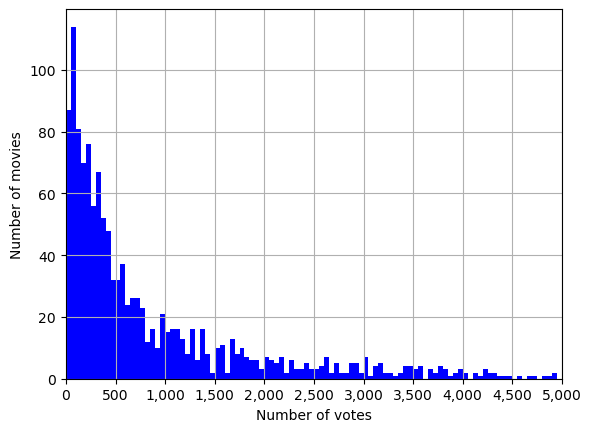

In [15]:
# Assuming you have a DataFrame named movies with a column 'vote_count'

# Create a histogram
plt.hist(df['vote_count'], bins=range(0, max(df['vote_count']) + 50, 50), color='blue')

# Customize the plot
plt.xlabel('Number of votes')
plt.ylabel('Number of movies')
plt.xticks(range(0, 5001, 500), labels=[f'{x:,}' for x in range(0, 5001, 500)])  # Format x-axis labels with commas
plt.xlim(0, 5000)  # Set the x-axis limits
plt.grid(True)

# Show the plot
plt.show()


### Top 20 Movies with Most Votes

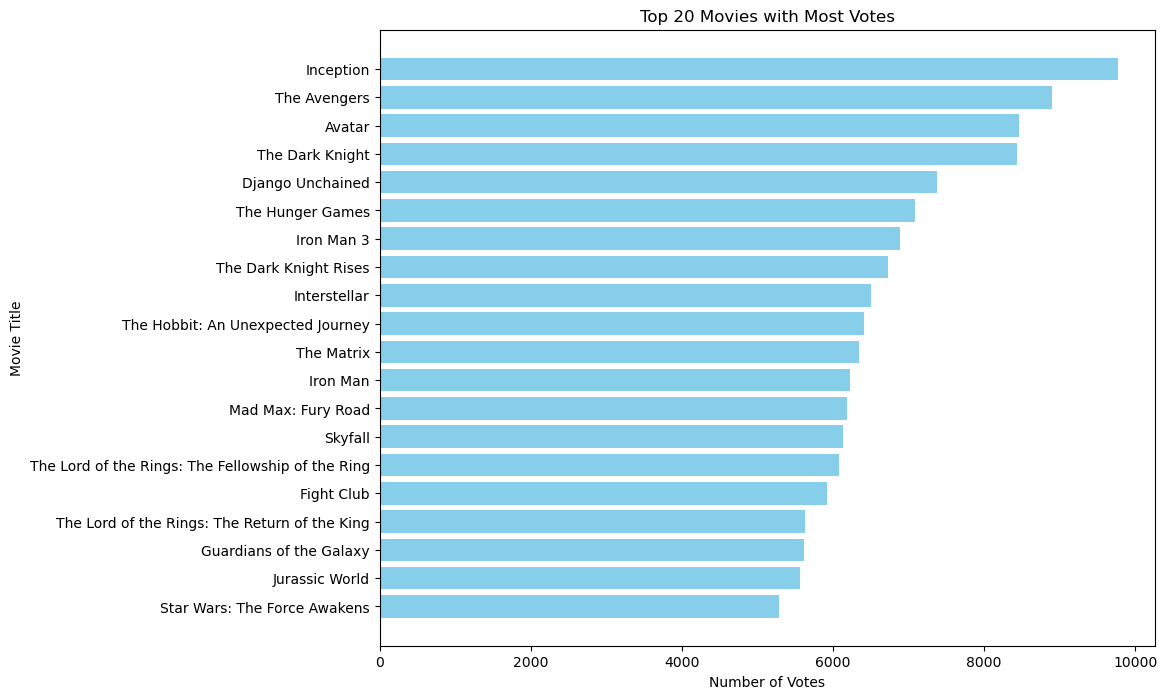

In [16]:

# Sort the deduplicated DataFrame by 'vote_count' in descending order and select the top 20 movies
top_movies = df.nlargest(20, 'vote_count')

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(top_movies['original_title'], top_movies['vote_count'], color='skyblue')

# Customize the plot
plt.xlabel('Number of Votes')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies with Most Votes')
plt.gca().invert_yaxis()  # Invert y-axis to display the movie with the most votes at the top

# Show the plot
plt.show()


### Top 20 Movies With Highest Vote Average (At least 250 votes)

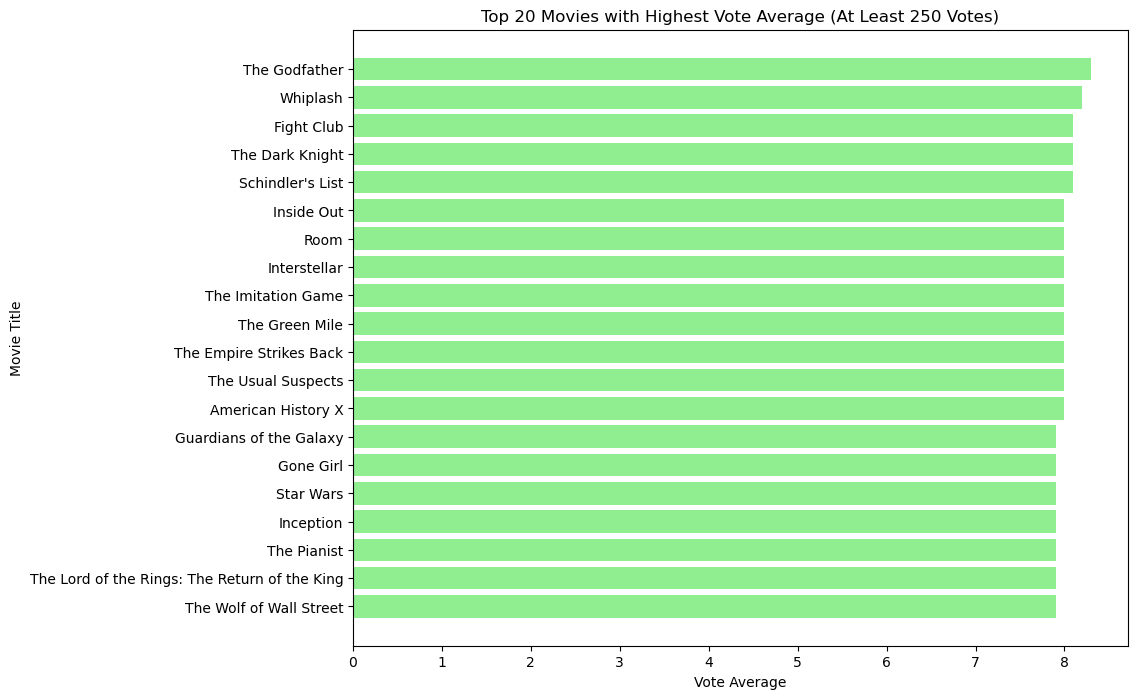

In [17]:

# Filter movies with at least 250 votes from the deduplicated DataFrame
popular_movies = df[df['vote_count'] >= 250]

# Sort the filtered DataFrame by 'vote_average' in descending order and select the top 20 movies
top_avg_movies = popular_movies.nlargest(20, 'vote_average')

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(top_avg_movies['original_title'], top_avg_movies['vote_average'], color='lightgreen')

# Customize the plot
plt.xlabel('Vote Average')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies with Highest Vote Average (At Least 250 Votes)')
plt.gca().invert_yaxis()  # Invert y-axis to display the movie with the highest vote average at the top

# Show the plot
plt.show()


#### Overview

In [29]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['original_title']).drop_duplicates()


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['overview'] = df['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(1287, 10470)

In [31]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape


(1287, 1287)

In [32]:
cosine_sim[1]


array([0.00675371, 1.        , 0.        , ..., 0.01343777, 0.03244566,
       0.        ])

In [33]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the item that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all items with that item
    sim_scores = cosine_sim[idx]

    # Sort the movies based on the similarity scores
    sim_scores_sorted_indices = np.argsort(sim_scores)[::-1]

    # Get the scores of the 10 most similar movies
    sim_scores_top_indices = sim_scores_sorted_indices[1:11]

    # Return the top 10 most similar movies
    return df['original_title'].iloc[sim_scores_top_indices].tolist()


In [34]:
pred = get_recommendations('The Dark Knight Rises')
print(pred)


['The Dark Knight', 'Batman Begins', 'Secret in Their Eyes', 'Max Payne', 'Beastly', 'American Sniper', 'Daredevil', 'Eraser', 'Justice League: The New Frontier', 'Case 39']


In [113]:
def calculate_cosine_sim():
    # Calculate the linear kernel using the TF-IDF matrix
    count = CountVectorizer(stop_words='english')
    count_matrix = count.fit_transform(df['soup'])
    cosine_sim = cosine_similarity(count_matrix, count_matrix)
    return cosine_sim

# Calculate and cache the linear kernel
cosine_sim = calculate_cosine_sim()

titles = df[['original_title']]
indices=pd.Series(data=list(titles.index), index= titles['original_title'] )

In [117]:
def content_model(title):
    # Get the index of the movie that matches the title
    index = indices[title]
    
    # Get the pairwsie similarity scores of all movies with the selected movie
    sim_scores = list(enumerate(cosine_sim[index]))
    
    # Sort the movies based on the similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the top n most similar movies 
    sim_scores = sim_scores[1:10+1]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    recommendations = []
    for (year, title) in (df.iloc[movie_indices][['release_year', 'original_title']].values):
        recommendations.append((title, year))
    
    return recommendations




In [119]:
content_model('The Dark Knight Rises')

[('The Dark Knight', 2008),
 ('Batman Begins', 2005),
 ('A Most Violent Year', 2014),
 ('Harsh Times', 2005),
 ('Vantage Point', 2008),
 ('Hitman', 2007),
 ('Takers', 2010),
 ('Blackhat', 2015),
 ('RockNRolla', 2008),
 ('Gangster Squad', 2013)]

## Collab

In [39]:
link = pd.read_csv('links_small.csv')
rating = pd.read_csv('ratings_small.csv')

merged_df = pd.merge(rating, link, on='movieId', how='inner')
merged_df = pd.merge(merged_df, df,left_on='tmdbId', right_on='id', how='inner')

In [40]:
merged_df.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId,Unnamed: 0,id,imdb_id,popularity,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,popularity_level,soup
0,1,1129,2.0,1260759185,82340,1103.0,8384,1103,tt0082340,1.003963,...,AVCO Embassy Pictures|Goldcrest Films Internat...,1981-05-22,336,6.5,1981,1.438914e+07,1.199095e+08,44000000.0,Medium,taxi streetgang u.s.president warveteran hosta...
1,7,1129,3.0,851869103,82340,1103.0,8384,1103,tt0082340,1.003963,...,AVCO Embassy Pictures|Goldcrest Films Internat...,1981-05-22,336,6.5,1981,1.438914e+07,1.199095e+08,44000000.0,Medium,taxi streetgang u.s.president warveteran hosta...
2,19,1129,3.0,855192347,82340,1103.0,8384,1103,tt0082340,1.003963,...,AVCO Embassy Pictures|Goldcrest Films Internat...,1981-05-22,336,6.5,1981,1.438914e+07,1.199095e+08,44000000.0,Medium,taxi streetgang u.s.president warveteran hosta...
3,21,1129,3.0,853848738,82340,1103.0,8384,1103,tt0082340,1.003963,...,AVCO Embassy Pictures|Goldcrest Films Internat...,1981-05-22,336,6.5,1981,1.438914e+07,1.199095e+08,44000000.0,Medium,taxi streetgang u.s.president warveteran hosta...
4,30,1129,3.0,945294508,82340,1103.0,8384,1103,tt0082340,1.003963,...,AVCO Embassy Pictures|Goldcrest Films Internat...,1981-05-22,336,6.5,1981,1.438914e+07,1.199095e+08,44000000.0,Medium,taxi streetgang u.s.president warveteran hosta...


In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23888 entries, 0 to 23887
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userId                23888 non-null  int64  
 1   movieId               23888 non-null  int64  
 2   rating                23888 non-null  float64
 3   timestamp             23888 non-null  int64  
 4   imdbId                23888 non-null  int64  
 5   tmdbId                23888 non-null  float64
 6   Unnamed: 0            23888 non-null  int64  
 7   id                    23888 non-null  int64  
 8   imdb_id               23888 non-null  object 
 9   popularity            23888 non-null  float64
 10  budget                23888 non-null  float64
 11  revenue               23888 non-null  float64
 12  original_title        23888 non-null  object 
 13  cast                  23888 non-null  object 
 14  homepage              23888 non-null  object 
 15  director           

In [45]:
merged_df.isnull().sum()

userId                  0
movieId                 0
rating                  0
timestamp               0
imdbId                  0
tmdbId                  0
Unnamed: 0              0
id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
profit                  0
popularity_level        0
soup                    0
dtype: int64

In [56]:
merged_df.drop(columns=['movieId','imdbId','tmdbId','Unnamed: 0'],inplace=True)
merged_df.rename(columns={'id': 'movieId'}, inplace=True)
merged_df.columns

Index(['userId', 'rating', 'timestamp', 'imdb_id', 'popularity', 'budget',
       'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline',
       'keywords', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj', 'profit', 'popularity_level', 'soup'],
      dtype='object')

In [109]:
def collab_model(original_title):
    

    moviemat = merged_df.pivot_table(index='userId', columns='original_title', values='rating')
    
    movie_ratings = moviemat[original_title]
    # Calculate correlation with other movies
    similar_to_movie = moviemat.corrwith(movie_ratings)
    corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.sort_values(by='Correlation', ascending=False)

    corr_movie = corr_movie[1:10+1]

    # Get the movie indices
    movie_indices = corr_movie.index

    recommendations = []
    for movie_title in movie_indices:
        year = merged_df.loc[merged_df['original_title'] == movie_title, 'release_year'].values[0]
        recommendations.append((movie_title, year, director))

    return recommendations


In [110]:
collab_model('Jurassic World')

D:\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
D:\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


[('Moonraker', 1979, ['lewisgilbert']),
 ('Angels & Demons', 2009, ['ronhoward']),
 ('Maze Runner: The Scorch Trials', 2015, ['wesball']),
 ('The Best Exotic Marigold Hotel', 2011, ['johnmadden']),
 ("On Her Majesty's Secret Service", 1969, ['peterr.hunt']),
 ('The Forbidden Kingdom', 2008, ['robminkoff']),
 ('Killers', 2010, ['robertluketic']),
 ('Jurassic World', 2015, ['colintrevorrow']),
 ('One for the Money', 2012, ['julieannerobinson']),
 ('The Informant!', 2009, ['stevensoderbergh'])]